In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
!pwd

/Users/bingobango/FoodSecurityForecaster/FoodSecurityForecaster/notebooks


In [51]:
Aweil_data = pd.read_pickle('../raw_data/raw_pixels/Aweil.zip')

In [52]:
Aweil_data

,band,date,value
0,DayOfYear,2010-01-01,7
1,DetailedQA,2010-01-01,2112
2,EVI,2010-01-01,1251
3,NDVI,2010-01-01,2726
4,RelativeAzimuth,2010-01-01,13365
...,...,...,...
2185915,ViewZenith,2017-12-19,1065
2185916,sur_refl_b01,2017-12-19,815
2185917,sur_refl_b02,2017-12-19,1676
2185918,sur_refl_b03,2017-12-19,364


In [53]:
Aweil_df = Aweil_data[Aweil_data['band'] == 'NDVI']
Aweil_df

,band,date,value
3,NDVI,2010-01-01,2726
15,NDVI,2010-01-17,2666
27,NDVI,2010-02-02,2630
39,NDVI,2010-02-18,2565
51,NDVI,2010-03-06,2648
...,...,...,...
2185863,NDVI,2017-10-16,6008
2185875,NDVI,2017-11-01,4888
2185887,NDVI,2017-11-17,3918
2185899,NDVI,2017-12-03,3861


In [54]:
value_min, value_max = Aweil_df['value'].min(), Aweil_df['value'].max()
value_min, value_max

(34, 9025)

In [107]:
histograms = []
dates = []
for date, group in Aweil_df.groupby('date'):
    hist = np.histogram(group['value'], bins=10, range=(0,9000))[0]
    histograms.append(hist)
    dates.append(date)

In [108]:
Aweil_histogram_df = pd.DataFrame(histograms, index=dates)

In [109]:
Aweil_histogram_df

,0,1,2,3,4,5,6,7,8,9
2010-01-01,0,0,113,707,162,8,0,0,0,0
2010-01-17,0,0,239,666,85,0,0,0,0,0
2010-02-02,0,0,305,580,103,2,0,0,0,0
2010-02-18,0,1,378,485,118,8,0,0,0,0
2010-03-06,0,1,378,482,127,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2017-10-16,0,0,0,0,6,92,415,401,76,0
2017-11-01,0,0,0,4,75,212,459,229,11,0
2017-11-17,0,0,8,195,340,259,177,11,0,0
2017-12-03,0,0,16,311,397,198,67,1,0,0


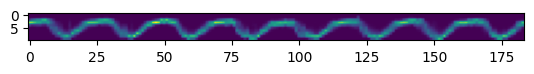

In [110]:
plt.imshow(Aweil_histogram_df.to_numpy().T)

In [62]:
import os

In [65]:
data_path = '../raw_data/raw_pixels'

In [67]:
os.listdir(data_path)

['Fashooda.zip',
 'Aliab.zip',
 'Ayod.zip',
 'Rabkona.zip',
 'Raja.zip',
 'Yerol.zip',
 'Meridi.zip',
 'Malut.zip',
 'Mayot.zip',
 'Aweil.zip',
 'Malek.zip',
 'Baleit.zip',
 'Pibor.zip',
 'Al Renk.zip',
 'Terkaka.zip',
 'Kajo Kaii.zip',
 'Nahr Lol.zip',
 'Tombura.zip',
 'Shobet.zip',
 'Faring.zip',
 'Al Leiri.zip',
 'Gogrial.zip',
 'Kapoeta.zip',
 'Al Mabien.zip',
 'Wanjuk.zip',
 'Tonga.zip',
 'Shokodom.zip',
 'Magwi.zip',
 'Sobat.zip',
 'Yambio.zip',
 'Fam al Zaraf.zip',
 'Rumbek.zip',
 'Bor.zip',
 'Nahr Atiem.zip',
 'Warab.zip',
 'Nahr Yei.zip',
 'Wat.zip',
 'Aryat.zip',
 'Mundri.zip',
 'Wau.zip',
 'Tonj.zip',
 'Al Mayom.zip',
 'Akobo.zip',
 'Amatonge.zip',
 'Bahr al Jabal.zip']

In [69]:
multi_df = []

In [70]:
for file in os.listdir(data_path):
    df = pd.read_pickle(os.path.join(data_path, file))
    multi_df.append(df)

In [72]:
multi_df

[                    band       date  value
 0              DayOfYear 2010-01-01      2
 1             DetailedQA 2010-01-01   2112
 2                    EVI 2010-01-01   1293
 3                   NDVI 2010-01-01   2373
 4        RelativeAzimuth 2010-01-01  13024
 ...                  ...        ...    ...
 2199163       ViewZenith 2017-12-19    153
 2199164     sur_refl_b01 2017-12-19   1132
 2199165     sur_refl_b02 2017-12-19   2120
 2199166     sur_refl_b03 2017-12-19    537
 2199167     sur_refl_b07 2017-12-19   1805
 
 [2199168 rows x 3 columns],
                     band       date  value
 0              DayOfYear 2010-01-01      2
 1             DetailedQA 2010-01-01   2181
 2                    EVI 2010-01-01    879
 3                   NDVI 2010-01-01   2294
 4        RelativeAzimuth 2010-01-01  13799
 ...                  ...        ...    ...
 2174875       ViewZenith 2017-12-19    451
 2174876     sur_refl_b01 2017-12-19    453
 2174877     sur_refl_b02 2017-12-19   2990
 

In [ ]:
frames = []

In [89]:
for file in multi_df:
    NDVI = file[file['band'] == 'NDVI']

In [92]:
NDVI

,band,date,value
3,NDVI,2010-01-01,3263
15,NDVI,2010-01-17,2674
27,NDVI,2010-02-02,2542
39,NDVI,2010-02-18,2584
51,NDVI,2010-03-06,2785
...,...,...,...
2196903,NDVI,2017-10-16,6929
2196915,NDVI,2017-11-01,6826
2196927,NDVI,2017-11-17,6440
2196939,NDVI,2017-12-03,5690


In [95]:
total_value_min, total_value_max = NDVI['value'].min(), NDVI['value'].max()
total_value_min, total_value_max

(393, 9260)

In [96]:
all_histograms = []
all_dates = []
for date, group in NDVI.groupby('date'):
    hist = np.histogram(group['value'], bins=50, range=(total_value_min, total_value_max))[0]
    all_histograms.append(hist)
    all_dates.append(date)

In [ ]:
Aweil_histogram_df = pd.DataFrame(histograms, index=dates)